In [1]:
# Import the libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools
from tensorflow.keras.layers import Input, LSTM, Dense, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [2]:
# Create function for confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False,title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normazilation can be apploed by setting 'normalize=True'
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without Normalization')
    
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [3]:
# Load in the data
data = tf.keras.datasets.fashion_mnist
(X_train_raw, y_train), (X_test_raw, y_test) = data.load_data()

# Scale the data to 0-1
X_train = X_train_raw / 255.0
X_test = X_test_raw / 255.0

# Havce a look at the shape
print('Train data shape:', X_train.shape)
print('Test data shape:', X_test.shape)

Train data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


Index: 5882


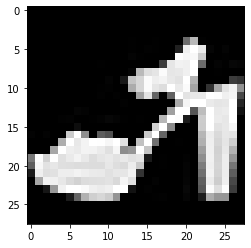

In [4]:
# Have a look at a random image
i = np.random.choice(X_test.shape[0])
print(f'Index: {i}')
plt.imshow(X_test[i], cmap='gray');

### Try solve fashion MNIST with LSTM

In [5]:
# Define the layers of the model
i = Input(shape=X_train[0].shape)
x = LSTM(128, activation='tanh')(i)
x = Dense(10, activation='softmax')(x)

# Create the model
model = Model(i, x)

# Define how the model should be trained
model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the mdoel
result = model.fit(x=X_train, y=y_train,
                   epochs=30,
                   validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 11s 186us/sample - loss: 0.6247 - accuracy: 0.7709 - val_loss: 0.4746 - val_accuracy: 0.8290
Epoch 2/30
60000/60000 [==============================] - 10s 166us/sample - loss: 0.4374 - accuracy: 0.8378 - val_loss: 0.4510 - val_accuracy: 0.8342
Epoch 3/30
60000/60000 [==============================] - 10s 165us/sample - loss: 0.3888 - accuracy: 0.8576 - val_loss: 0.3931 - val_accuracy: 0.8561
Epoch 4/30
60000/60000 [==============================] - 10s 170us/sample - loss: 0.3563 - accuracy: 0.8680 - val_loss: 0.4019 - val_accuracy: 0.8503
Epoch 5/30
60000/60000 [==============================] - 10s 172us/sample - loss: 0.3346 - accuracy: 0.8765 - val_loss: 0.3986 - val_accuracy: 0.8532
Epoch 6/30
60000/60000 [==============================] - 11s 179us/sample - loss: 0.3166 - accuracy: 0.8835 - val_loss: 0.3440 - val_accuracy: 0.8756
Epoch 7/30
60000/60000 [====================

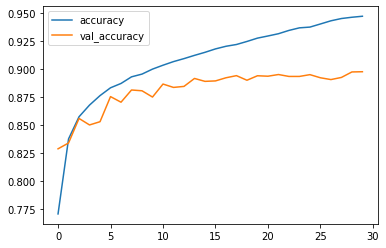

In [6]:
# Plot the cost function at each itteration
# Note: model.fit() returns an object that contains the history of the training process
plt.plot(result.history['accuracy'], label='accuracy');
plt.plot(result.history['val_accuracy'], label='val_accuracy');
plt.legend();

Confusion matrix, without Normalization
[[827   1  12  24   5   0 126   0   5   0]
 [  5 973   2  13   0   0   5   0   2   0]
 [ 22   0 810   7  86   1  73   0   1   0]
 [ 13   5  19 913  26   0  21   0   3   0]
 [  0   0  68  39 838   0  54   0   1   0]
 [  0   0   0   2   0 969   0  12   1  16]
 [100   1  62  24  73   0 735   0   5   0]
 [  0   0   0   0   0   9   0 969   0  22]
 [  4   0   2   4   3   0   4   3 979   1]
 [  1   0   0   0   0   4   0  30   0 965]]


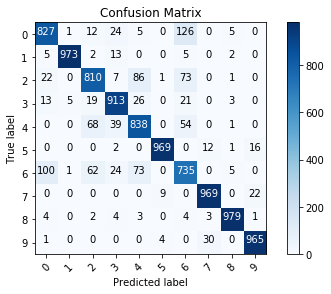

In [7]:
# Plot confusion matrix
p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

Performs about the same as the ANN. What about with return_sequences=True?

In [8]:
# Define the layers of the model
i = Input(shape=X_train[0].shape)
x = LSTM(128, activation='tanh', return_sequences=True)(i)
x = GlobalMaxPool1D()(x)
x = Dense(10, activation='softmax')(x)

# Create the model
model = Model(i, x)

# Define how the model should be trained
model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the mdoel
result = model.fit(x=X_train, y=y_train,
                   epochs=30,
                   validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 9s 142us/sample - loss: 0.6522 - accuracy: 0.7688 - val_loss: 0.4874 - val_accuracy: 0.8200
Epoch 2/30
60000/60000 [==============================] - 7s 125us/sample - loss: 0.4387 - accuracy: 0.8385 - val_loss: 0.4491 - val_accuracy: 0.8325
Epoch 3/30
60000/60000 [==============================] - 8s 126us/sample - loss: 0.3894 - accuracy: 0.8566 - val_loss: 0.4088 - val_accuracy: 0.8448
Epoch 4/30
60000/60000 [==============================] - 7s 124us/sample - loss: 0.3607 - accuracy: 0.8669 - val_loss: 0.3772 - val_accuracy: 0.8598
Epoch 5/30
60000/60000 [==============================] - 9s 156us/sample - loss: 0.3378 - accuracy: 0.8750 - val_loss: 0.3708 - val_accuracy: 0.8654
Epoch 6/30
60000/60000 [==============================] - 9s 145us/sample - loss: 0.3203 - accuracy: 0.8805 - val_loss: 0.3486 - val_accuracy: 0.8720
Epoch 7/30
60000/60000 [==========================

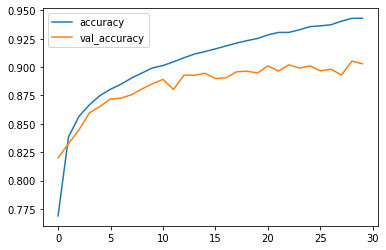

In [9]:
# Plot the cost function at each itteration
# Note: model.fit() returns an object that contains the history of the training process
plt.plot(result.history['accuracy'], label='accuracy');
plt.plot(result.history['val_accuracy'], label='val_accuracy');
plt.legend();

Confusion matrix, without Normalization
[[857   4  11  20   3   1  98   0   6   0]
 [  8 975   0  12   0   0   4   0   1   0]
 [ 18   2 839  11  67   1  62   0   0   0]
 [ 24   5   9 915  19   0  28   0   0   0]
 [  3   1  78  33 820   1  64   0   0   0]
 [  0   0   0   1   0 987   0   5   1   6]
 [120   1  52  27  60   1 736   0   3   0]
 [  0   0   0   0   0  20   0 962   0  18]
 [  4   0   5   4   3   3   6   1 973   1]
 [  0   0   0   0   0   6   1  27   0 966]]


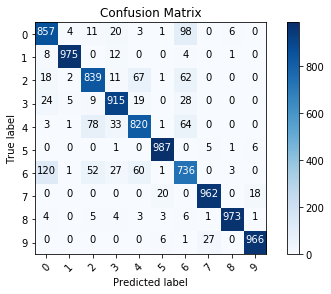

In [10]:
# Plot confusion matrix
p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

It doesn't do any better.